# Children Under Five Mortality With Deep Learning 

**Install necessary libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install -U scikit-learn


In [ ]:
!pip install pingouin

     |████████████████████████████████| 183 kB 8.5 MB/s 
     |████████████████████████████████| 38.1 MB 11.7 MB/s 
     |████████████████████████████████| 9.8 MB 34.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=1b69dd0b9ad81f4aa1d7b411c3489c53609f2871a33739fa41581518d56b6325
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9b0c12b3628a1666d93c6479eeb2dd9d09e96d4c50a4bdfa578812167371bc38
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 8.6 MB/s 


**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
from sklearn import datasets
from sklearn.linear_model import LogisticRegression # Logistic Regression classifier
from sklearn.model_selection import train_test_split  # for splitting the data into train and test sets

from sklearn.metrics import accuracy_score  # for calculating accuracy
from sklearn.metrics import precision_recall_fscore_support  # for calculating precision, recall, and F1-score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import tempfile

import matplotlib as mpl

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import GridSearchCV

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
# To use Spark and its API import the SparkContext
from pyspark import SparkContext
from pyspark.sql import SparkSession
# Create Spark Context
sc = SparkSession.builder.master("local[*]")\
     .config("spark.jars.packages", "org.apache.spark:spark-avro_2.12:3.1.2")\
     .getOrCreate()

In [ ]:
# Load Data
df = sc.read.format("csv").load("sample_data/data.csv", header=True)

df.show()

+-----------------+---------+------+-------------+-------+----------+----------+-------+-----+-----+--------+----+----------+-----+--------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+-----------+--------+--------+---+-------+-------+-------+-------+-------+---+
|underfivesurvival|antevisit|timing|placedelivery|mosqnet|mothanemic|pregwanted|marstat|death|women|headship|bage|occupation|media|religion|residence|region1|region2|region3|region4|region5|region6|region7|region8|region9|region10|distance|prebirth|first_child|polygyny|multiple|sex|wealth1|wealth2|wealth3|wealth4|wealth5|age|
+-----------------+---------+------+-------------+-------+----------+----------+-------+-----+-----+--------+----+----------+-----+--------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+-----------+--------+--------+---+-------+-------+-------+-------+-------+---+
|               

In [ ]:
# Converting Spark DataFrame to Pandas DataFrame for Data Cleaning
df = df.toPandas()
df.head()

,underfivesurvival,antevisit,timing,placedelivery,mosqnet,mothanemic,pregwanted,marstat,death,women,...,first_child,polygyny,multiple,sex,wealth1,wealth2,wealth3,wealth4,wealth5,age
0,1,1,1,1,1,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,None,1,1,1,0,1,1,0,...,1,1,0,1,0,1,0,0,0,0
2,0,0,None,None,1,1,0,1,1,0,...,1,1,0,1,0,1,0,0,0,0
3,1,0,None,None,1,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
4,1,0,None,None,1,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
# Looking for total number rows and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   underfivesurvival  23118 non-null  object
 1   antevisit          4456 non-null   object
 2   timing             4292 non-null   object
 3   placedelivery      5882 non-null   object
 4   mosqnet            23118 non-null  object
 5   mothanemic         11695 non-null  object
 6   pregwanted         1684 non-null   object
 7   marstat            23118 non-null  object
 8   death              23118 non-null  object
 9   women              23118 non-null  object
 10  headship           23118 non-null  object
 11  bage               20862 non-null  object
 12  occupation         23118 non-null  object
 13  media              23118 non-null  object
 14  religion           23118 non-null  object
 15  residence          23118 non-null  object
 16  region1            23118 non-null  objec

In [ ]:
# Converting data to numbers
for cols in  df.columns:
  df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Looking for total number rows and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   underfivesurvival  23118 non-null  int64  
 1   antevisit          4456 non-null   float64
 2   timing             4292 non-null   float64
 3   placedelivery      5882 non-null   float64
 4   mosqnet            23118 non-null  int64  
 5   mothanemic         11695 non-null  float64
 6   pregwanted         1684 non-null   float64
 7   marstat            23118 non-null  int64  
 8   death              23118 non-null  int64  
 9   women              23118 non-null  int64  
 10  headship           23118 non-null  int64  
 11  bage               20862 non-null  float64
 12  occupation         23118 non-null  int64  
 13  media              23118 non-null  int64  
 14  religion           23118 non-null  int64  
 15  residence          23118 non-null  int64  
 16  region1            231

# Data Cleaning

In [ ]:
# Checking for unique values in each column
df.nunique()

underfivesurvival     2
antevisit             2
timing                2
placedelivery         2
mosqnet               2
mothanemic            2
pregwanted            2
marstat               3
death                 2
women                 6
headship              2
bage                 38
occupation            2
media                 2
religion              2
residence             2
region1               2
region2               2
region3               2
region4               2
region5               2
region6               2
region7               2
region8               2
region9               2
region10              2
distance              2
prebirth             13
first_child           2
polygyny              2
multiple              2
sex                   2
wealth1               2
wealth2               2
wealth3               2
wealth4               2
wealth5               2
age                   2
dtype: int64

In [ ]:
# Looking for missing values and Data inconsistencies in each column
df.isnull().sum()

underfivesurvival        0
antevisit            18662
timing               18826
placedelivery        17236
mosqnet                  0
mothanemic           11423
pregwanted           21434
marstat                  0
death                    0
women                    0
headship                 0
bage                  2256
occupation               0
media                    0
religion                 0
residence                0
region1                  0
region2                  0
region3                  0
region4                  0
region5                  0
region6                  0
region7                  0
region8                  0
region9                  0
region10                 0
distance                 6
prebirth                 0
first_child              0
polygyny              3750
multiple                 0
sex                      0
wealth1                  0
wealth2                  0
wealth3                  0
wealth4                  0
wealth5                  0
a

In [ ]:
# All binary columns with no value will be replace with 0
df = df.fillna({'antevisit': 0})
df = df.fillna({'timing': 0})
df = df.fillna({'placedelivery': 0})
df = df.fillna({'mothanemic': 0})
df = df.fillna({'pregwanted': 0})
df = df.fillna({'polygyny': 0})
df = df.fillna({'birthsize': 0})

In [ ]:
# Finding the median for bage
df.bage.median()

25.0

In [ ]:
# Finding the mean for bage
df.distance.mean()

0.32641052267220494

In [ ]:
# fillinng in the median and mean for bage and distance  
df = df.fillna({'bage': 25})
df = df.fillna({'distance': 0.32641052267220494})

In [ ]:
# Looking for missing values and Data inconsistencies in each column
df.isnull().sum()

underfivesurvival    0
antevisit            0
timing               0
placedelivery        0
mosqnet              0
mothanemic           0
pregwanted           0
marstat              0
death                0
women                0
headship             0
bage                 0
occupation           0
media                0
religion             0
residence            0
region1              0
region2              0
region3              0
region4              0
region5              0
region6              0
region7              0
region8              0
region9              0
region10             0
distance             0
prebirth             0
first_child          0
polygyny             0
multiple             0
sex                  0
wealth1              0
wealth2              0
wealth3              0
wealth4              0
wealth5              0
age                  0
dtype: int64

# Data Visualisation


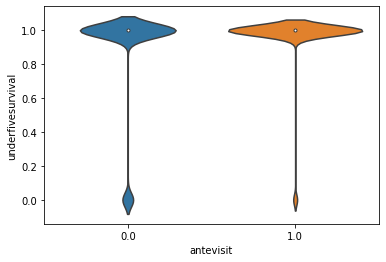

In [ ]:
# data visualisation for 
sns.violinplot(x="antevisit", y="underfivesurvival", data=df)


- From the visualization, we can see that the number of children that survived and their mothers visited antenatal care had a high survival rate. As compared to those whose mothers did not visit antenatal care.

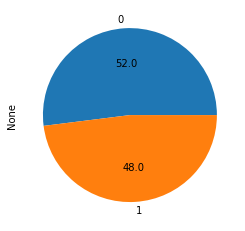

In [ ]:
# data visualisation for mother and children that sleeps under mosquitoe net
df.groupby('mosqnet').size().plot(kind='pie', autopct='%.1f')

# From the pie chart, we can see that 52% of mothers and children do not sleep under mosquitoe nets and 48% do sleep under mosquitoe nets.

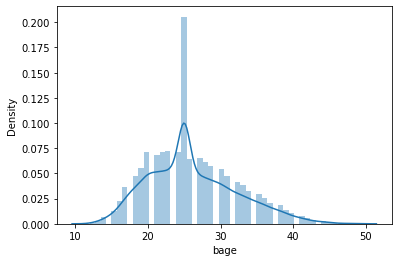

In [ ]:
sns.distplot(df.bage)

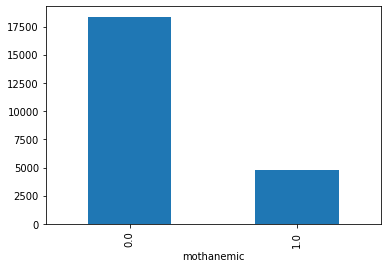

In [ ]:
# data visualisation for left and satisfaction_level
df.groupby(['mothanemic']).size().plot(kind='bar')

- From the visualization above, the number of mothers with anemic conditions is low than those mothers with no anemic conditions.

# Decriptive Analysis

In [ ]:
# Descriptive Analysis
df.describe()

,underfivesurvival,antevisit,timing,placedelivery,mosqnet,mothanemic,pregwanted,marstat,death,women,...,first_child,polygyny,multiple,sex,wealth1,wealth2,wealth3,wealth4,wealth5,age
count,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,...,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000,23118.000000
mean,0.910978,0.159832,0.117874,0.176789,0.480189,0.205900,0.053292,1.098927,0.371572,0.472705,...,0.718358,0.194827,0.037849,0.513756,0.324812,0.228523,0.196470,0.141924,0.108271,0.560559
std,0.284781,0.366458,0.322465,0.381498,0.499618,0.404367,0.224620,0.390036,0.483235,0.781216,...,0.449809,0.396076,0.190836,0.499822,0.468315,0.419890,0.397337,0.348980,0.310729,0.496330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Pivot talbe for cancelled to find the the number of children who died and survived.
df.groupby(['underfivesurvival']).size()

underfivesurvival
0     2058
1    21060
dtype: int64

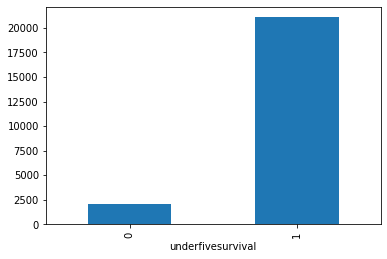

In [ ]:
# plot for cancelled
df.groupby(['underfivesurvival']).size().plot(kind='bar')

# Exploratory Analysis

In [ ]:
# Correlation Analysis without Dummies
df.corr()

,underfivesurvival,antevisit,timing,placedelivery,mosqnet,mothanemic,pregwanted,marstat,death,women,...,first_child,polygyny,multiple,sex,wealth1,wealth2,wealth3,wealth4,wealth5,age
underfivesurvival,1.000000,0.093237,0.080826,0.069612,0.007670,-0.000097,0.003161,-0.020800,-0.406537,-0.031144,...,0.025456,-0.037986,-0.097989,-0.025131,-0.048503,-0.003147,0.010068,0.030503,0.030221,0.036918
antevisit,0.093237,1.000000,0.797096,0.688083,0.026392,0.004437,0.067839,-0.127577,-0.140450,-0.085017,...,0.056073,-0.055698,-0.027126,0.005827,-0.041635,-0.024288,-0.005929,0.042820,0.055062,0.090314
timing,0.080826,0.797096,1.000000,0.588727,0.032888,-0.000358,0.056605,-0.096157,-0.121739,-0.080385,...,0.044578,-0.053142,-0.027513,0.008325,-0.038989,-0.032180,-0.003843,0.038155,0.064310,0.090403
placedelivery,0.069612,0.688083,0.588727,1.000000,0.027341,-0.006594,0.040989,-0.136148,-0.154074,-0.109142,...,0.015647,-0.093116,0.039994,0.005055,-0.094793,-0.038880,0.009139,0.077967,0.096155,0.117655
mosqnet,0.007670,0.026392,0.032888,0.027341,1.000000,0.030898,-0.007552,-0.041110,0.000570,-0.069879,...,0.019924,-0.003666,0.010360,0.000831,0.117448,0.129941,-0.016129,-0.143527,-0.170784,-0.020718
mothanemic,-0.000097,0.004437,-0.000358,-0.006594,0.030898,1.000000,0.050641,0.006063,0.001620,0.011903,...,0.002049,0.000439,0.009999,-0.000958,0.002260,0.033179,0.011254,-0.026841,-0.032489,0.012230
pregwanted,0.003161,0.067839,0.056605,0.040989,-0.007552,0.050641,1.000000,-0.064622,-0.036974,-0.049889,...,-0.056951,0.017005,0.013492,0.000791,0.011856,0.010301,-0.029106,-0.017577,0.025170,0.028477
marstat,-0.020800,-0.127577,-0.096157,-0.136148,-0.041110,0.006063,-0.064622,1.000000,0.068444,-0.000721,...,0.070547,-0.124767,0.010716,-0.003763,-0.059880,0.005908,0.064666,0.023969,-0.027346,-0.018993
death,-0.406537,-0.140450,-0.121739,-0.154074,0.000570,0.001620,-0.036974,0.068444,1.000000,0.088171,...,0.160266,0.115366,0.082969,0.008568,0.147542,0.013854,-0.022457,-0.089299,-0.112080,-0.116909
women,-0.031144,-0.085017,-0.080385,-0.109142,-0.069879,0.011903,-0.049889,-0.000721,0.088171,1.000000,...,0.056108,0.287428,0.002723,-0.050775,0.126333,-0.039602,-0.054633,-0.042833,-0.018922,-0.073497


## First of all we need to explain the positives and negatives associated with the numbers obtained.
- Positive Correlation; A positive correlation is a relationship between 2 variables which the increase of one variable causes an increase for another variable.
- Negative Correlation; The Negative correlation is the opposite, it’s a relationship between 2 variables which the increase of one variable causes a decrease for another variable. This applies otherwise.
- From our correlation analysis, we can see age has AGE has a positive weak correlation with output_0 (less chance of heart attack). This means that as age increase the more likely there is a chance of heart attack and vice versa.
- We can also see that AGE has a negative weak correlation with output_1 (more chance of heart attack). This means that the lower the age the patient will not have more chance of a heat attack and vice versa.

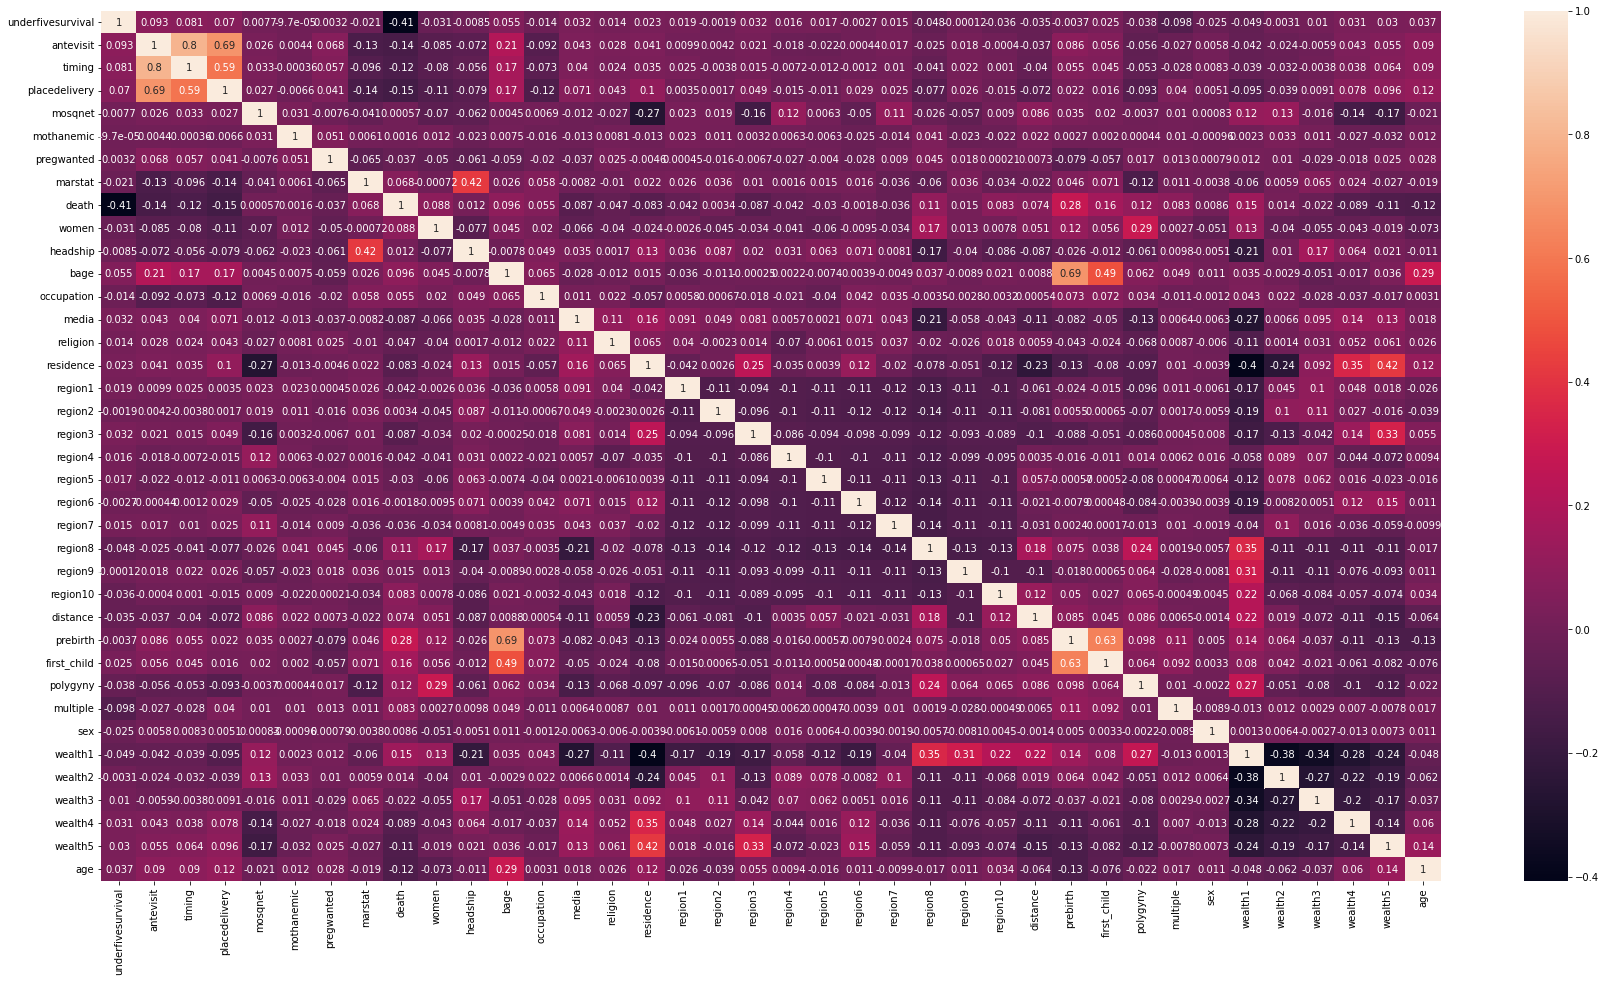

In [ ]:
# heatmap for correlation
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot=True)

# Statistical Inference

In [ ]:
# T-test for clients who is less likely or more likely in relation to age if their mean values are the same
no = df[df['underfivesurvival'] == 0]['bage']
yes = df[df['underfivesurvival'] == 1]['bage']

pg.ttest(no, yes, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.315078,23116,two-sided,9.669031e-17,"[-1.44, -0.89]",0.192039,2.381e+13,1.0


In [ ]:
# T-test for clients who is less likely or more likely in relation to age if their mean values are the same
no = df[df['underfivesurvival'] == 0]['distance']
yes = df[df['underfivesurvival'] == 1]['distance']

pg.ttest(no, yes, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.384724,23116,two-sided,7.326351e-08,"[0.04, 0.08]",0.124362,4.954e+04,0.999692


- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A high p-value (> 0.05) means we can't reject the null hypothesis
- Since we have a low p-value, we reject the null hypothesis that output and age are not the same.

# Feature Selection Using the P-Value to test for statistcal significance.

In [ ]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)
import scipy.stats as stats
cl_corr = pd.DataFrame() # Correlation matrix
cl_p = pd.DataFrame() # Matrix of p-values
for x in df.columns:   # assuming cl as your dataframe name
   for y in df.columns:
      corr = stats.pearsonr(df[x], df[y])
      cl_corr.loc[x,y] = corr[0]
      cl_p.loc[x,y] = corr[1]

cl_p['underfivesurvival']

underfivesurvival    0.000000e+00
antevisit            8.345211e-46
timing               8.128534e-35
placedelivery        3.093245e-26
mosqnet              2.435451e-01
mothanemic           9.882680e-01
pregwanted           6.307870e-01
marstat              1.563247e-03
death                0.000000e+00
women                2.177458e-06
headship             1.960292e-01
bage                 9.669031e-17
occupation           3.958100e-02
media                8.331116e-07
religion             2.853100e-02
residence            3.641708e-04
region1              3.960547e-03
region2              7.700416e-01
region3              8.788248e-07
region4              1.310363e-02
region5              8.460478e-03
region6              6.822177e-01
region7              2.347029e-02
region8              1.868081e-13
region9              9.853331e-01
region10             5.928998e-08
distance             7.326351e-08
prebirth             5.772653e-01
first_child          1.084365e-04
polygyny      

- At the confidence level of 95%, we have some predictors not statistically significant and in appropriation, we are to drop these variables. But in reality or the real world, some predictors may not be statistically signifcant but a high influence on the predicted variable.
- For instance, in the reality, mothers who have anemic conditions are at risk to lose their child but hre we see that motheranemic variable is not statistically significant.  

# Model Building

In [ ]:
# Separating target variable and predictors
y = df['underfivesurvival']
x = df.drop(['underfivesurvival'], axis=1)

In [ ]:
# Normalization data to bring all values to common scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:1]

array([[ 2.29271955,  2.73562968,  2.15788594,  1.04043985,  1.96385404,
        -0.23725871, -0.25364136,  1.30048795, -0.60510197, -0.57312127,
         2.28589906,  0.34366837,  0.39007114,  0.21899797, -0.81097449,
         3.01217573, -0.33813502, -0.28440548, -0.30274749, -0.32884525,
        -0.34555364, -0.34719843, -0.40444978, -0.32787521, -0.31418472,
        -0.69621086,  4.16339442,  0.62614981,  2.03292176, -0.19833865,
        -1.02790009, -0.6935911 ,  1.83736844, -0.49447856, -0.40669152,
        -0.34844863, -1.12943246]])

In [ ]:
# splitting data into training and test data at 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =100)

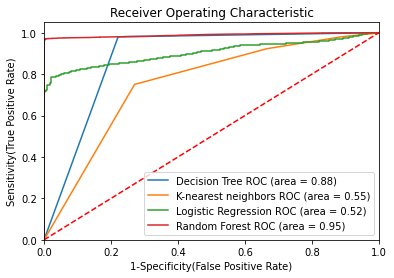

In [ ]:
# Test four classification algorithms to see which one yields the highest Area Under the Curve
## Best model selection

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=20000),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- We have Random forest Classifer witht he highest Area Under the Curve with 94%. 

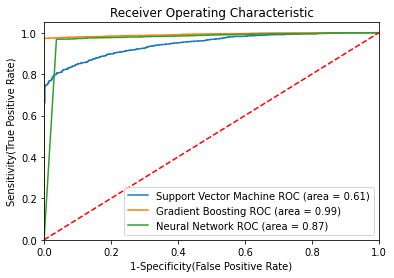

In [ ]:
# Best model selection for advance algorithms
# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Support Vector Machine',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Neural Network',
    'model': MLPClassifier(solver='lbfgs', max_iter=15000),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- We have Gradient Boosting Classifier having the highest Area Under the Curve with 99%. 

# Using Random Forest Classifier For Model Building (Embedding Method)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)    #building 100 decision trees
rfc=rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9993511409105655

In [ ]:
R_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(R_pred, y_test)
print (accuracy)

0.9708044982698962


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, R_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.973773238677631
0.9708044982698962
0.9717977627281649


# Using Gradient Boosting Classifier For Model Building (Embedding Method)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0) 

# fit the model
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.9761544284632854

In [ ]:
G_pred = gb.predict(X_test)

In [ ]:
accuracy = accuracy_score(G_pred, y_test)
print (accuracy)

0.9749134948096886


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, G_pred, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9804776145077309
0.9749134948096886
0.9763031056058203


# Model Evaluation and Deployment

We chose Gradient Boosting Classifier as the best model

In [ ]:
#Model evaluation with Gradient Boosting Classifier
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

0.9749134948096886
--------------------------------------------------------
[[ 407    0]
 [ 116 4101]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       407
           1       1.00      0.97      0.99      4217

    accuracy                           0.97      4624
   macro avg       0.89      0.99      0.93      4624
weighted avg       0.98      0.97      0.98      4624

--------------------------------------------------------
0.9862461465496799


Test accuracy for the gradient boosting classifier is 97% which is our baseline.

### Checking for predictors with high influence on the target label

In [ ]:
pd.DataFrame(gb.feature_importances_, index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
bage,7.751557e-01
death,2.120856e-01
prebirth,7.006757e-03
first_child,1.545417e-03
multiple,1.498055e-03
age,6.982000e-04
women,4.994944e-04
marstat,1.784055e-04
region10,1.602976e-04
placedelivery,1.506576e-04


# Building Predictive Model Using CNN directly from Keras

In [ ]:
# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Building our predictive model with keras
model = Sequential()
model.add(Dense(11, activation='relu',input_dim=37))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train, y_train,epochs=100)

Epoch 1/100
578/578 [==============================] - 2s 2ms/step - loss: 0.2780 - accuracy: 0.9105
Epoch 2/100
578/578 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.9109
Epoch 3/100
578/578 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9173
Epoch 4/100
578/578 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9439
Epoch 5/100
578/578 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9601
Epoch 6/100
578/578 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9689
Epoch 7/100
578/578 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9720
Epoch 8/100
578/578 [==============================] - 1s 2ms/step - loss: 0.0624 - accuracy: 0.9740
Epoch 9/100
578/578 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9751
Epoch 10/100
578/578 [==============================] - 3s 6ms/step - loss: 0.0588 - accura

In [ ]:
# predicting for test data
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
# Accuracy score for test data
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 96.89 %


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, Y_pred_nn, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9718925327090163
0.9688581314878892
0.969903140651154


# ROC Curve

In [ ]:
# importing libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

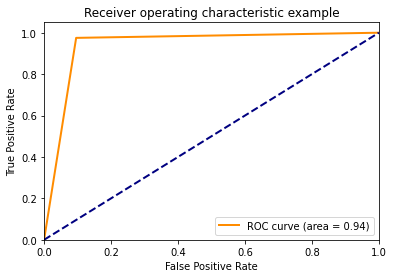

In [ ]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_nn)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Building a CNN model with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[37]),
    layers.Dense(4, activation='relu'), 
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.5),    
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 1000 epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

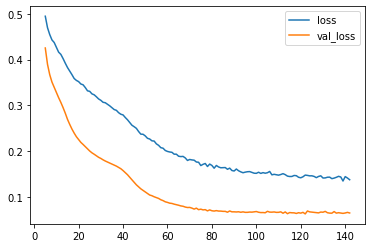

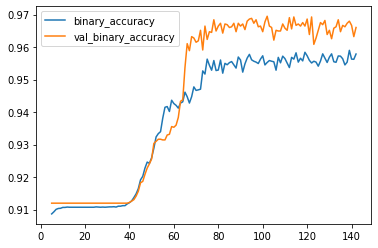

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

There is no overfitting since the validation accuracy and target accuracy are not farther apart.

In [ ]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.0631
Best Validation Accuracy: 0.9695


In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 96.93 %


In [ ]:
# Calculating Precision, Recall, and F1-score for each class using Y_test and Y_pred
precision, recall, f1measure, support = precision_recall_fscore_support(y_test, Y_pred_nn, average='weighted')
print (precision)
print (recall)
print (f1measure)

0.9718614620585994
0.9692906574394463
0.9702056302498487


# ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

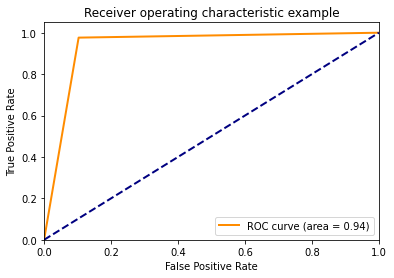

In [ ]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_nn)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Next Model to build is a model that deals with class imbalance even though we have a mild degree of imbalance

# Class Imbalance Approach
Clean, split and normalize the data

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('underfivesurvival'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('underfivesurvival'))
test_labels = np.array(test_df.pop('underfivesurvival'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# We normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)



Training labels shape: (14795,)
Validation labels shape: (3699,)
Test labels shape: (4624,)
Training features shape: (14795, 37)
Validation features shape: (3699, 37)
Test features shape: (4624, 37)


# looking at the dataset imbalance:

In [ ]:
neg, pos = np.bincount(df['underfivesurvival'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 23118
    Positive: 21060 (91.10% of total)



In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define the model and metrics

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Creating the model

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

# Building the baseline model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                608       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(train_features[:10])

array([[0.78019404],
       [0.21718076],
       [0.3055621 ],
       [0.24958387],
       [0.63489807],
       [0.31334049],
       [0.30580193],
       [0.5061275 ],
       [0.9176176 ],
       [0.18707913]], dtype=float32)

In [ ]:
# Checking for loss with the baseline model
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.2345


# Correcting Initial Bias

In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([2.32564087])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.8665376 ],
       [0.8917278 ],
       [0.7463509 ],
       [0.50723153],
       [0.7413949 ],
       [0.70335853],
       [0.8940855 ],
       [0.9474567 ],
       [0.33184004],
       [0.74928147]], dtype=float32)

In [ ]:
# Checking for loss after correcting initial bias
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4050


In [ ]:
# Saving the initial weight
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

# Confirm that the bias fix helps

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

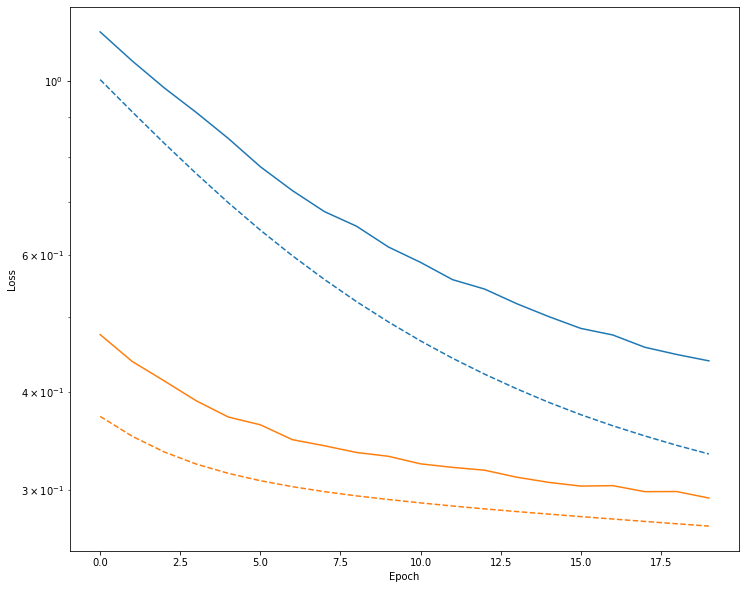

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

# Train the model

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
8/8 [==============================] - 4s 171ms/step - loss: 0.4659 - tp: 15275.0000 - fp: 1612.0000 - tn: 91.0000 - fn: 1516.0000 - accuracy: 0.8309 - precision: 0.9045 - recall: 0.9097 - auc: 0.5250 - prc: 0.9245 - val_loss: 0.3731 - val_tp: 3272.0000 - val_fp: 326.0000 - val_tn: 8.0000 - val_fn: 93.0000 - val_accuracy: 0.8867 - val_precision: 0.9094 - val_recall: 0.9724 - val_auc: 0.4779 - val_prc: 0.9116
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4377 - tp: 12218.0000 - fp: 1287.0000 - tn: 82.0000 - fn: 1208.0000 - accuracy: 0.8314 - precision: 0.9047 - recall: 0.9100 - auc: 0.4795 - prc: 0.9130 - val_loss: 0.3521 - val_tp: 3325.0000 - val_fp: 329.0000 - val_tn: 5.0000 - val_fn: 40.0000 - val_accuracy: 0.9002 - val_precision: 0.9100 - val_recall: 0.9881 - val_auc: 0.4997 - val_prc: 0.9158
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4110 - tp: 12531.0000 - fp: 1311.0000 - tn: 58.0000 - fn: 895.0000 - accuracy: 0.

# Check training history
In this section, you will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting.

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

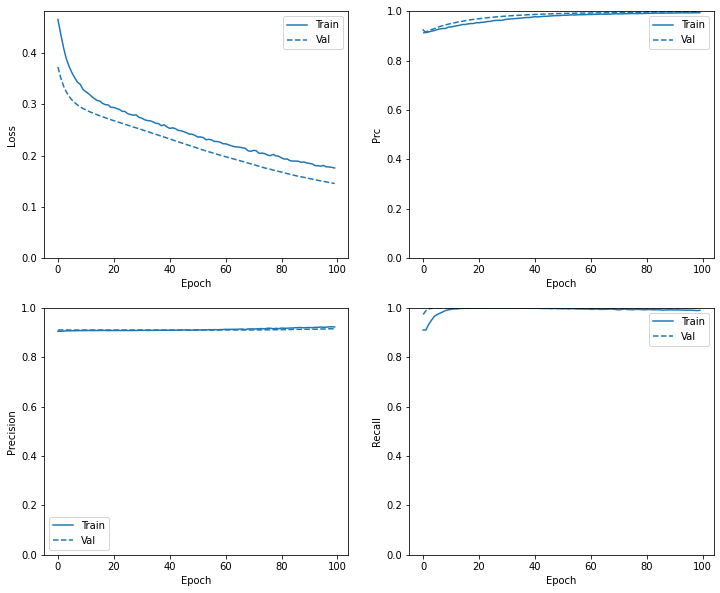

In [ ]:
plot_metrics(baseline_history)

# Evaluate metrics
we will use a confusion matrix to summarize the actual vs. predicted labels, where the X axis is the predicted label and the Y axis is the actual label

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

### Evaluate your model on the test dataset and display the results for the metrics you created above:

loss :  0.1373787522315979
tp :  4266.0
fp :  342.0
tn :  13.0
fn :  3.0
accuracy :  0.925389289855957
precision :  0.92578125
recall :  0.9992972612380981
auc :  0.9718936681747437
prc :  0.997684121131897

Legitimate Transactions Detected (True Negatives):  13
Legitimate Transactions Incorrectly Detected (False Positives):  342
Fraudulent Transactions Missed (False Negatives):  3
Fraudulent Transactions Detected (True Positives):  4266
Total Fraudulent Transactions:  4269


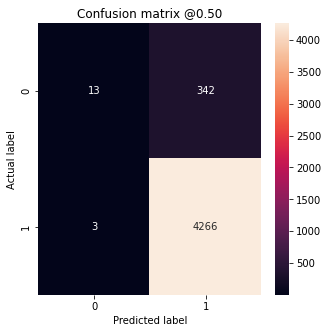

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

We can see that, the number of misclassified or false positives are more the true negatives or correctly classfied which is a problem. Accuracy is 92%

# Plot the ROC

In [ ]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

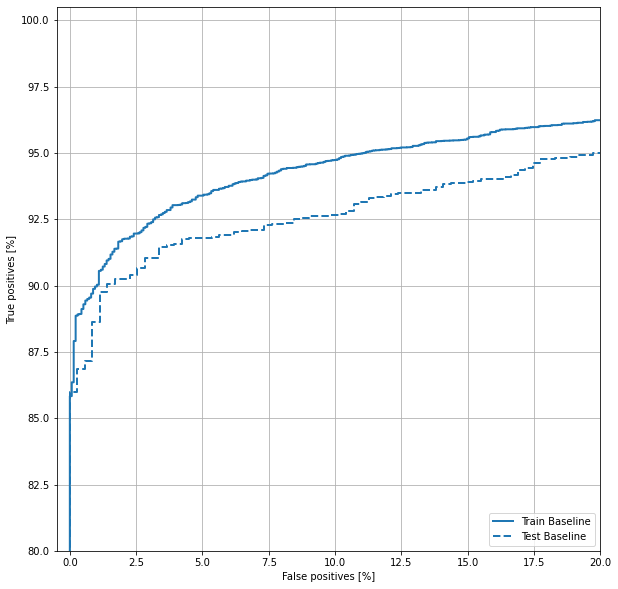

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

# Calculate class weights

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 5.62
Weight for class 1: 0.55


# Train a model with class weights

In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
8/8 [==============================] - 3s 157ms/step - loss: 1.2532 - tp: 15921.0000 - fp: 1606.0000 - tn: 118.0000 - fn: 1774.0000 - accuracy: 0.8259 - precision: 0.9084 - recall: 0.8997 - auc: 0.6059 - prc: 0.9476 - val_loss: 0.4011 - val_tp: 3180.0000 - val_fp: 323.0000 - val_tn: 11.0000 - val_fn: 185.0000 - val_accuracy: 0.8627 - val_precision: 0.9078 - val_recall: 0.9450 - val_auc: 0.4735 - val_prc: 0.9105
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.1913 - tp: 11613.0000 - fp: 1245.0000 - tn: 124.0000 - fn: 1813.0000 - accuracy: 0.7933 - precision: 0.9032 - recall: 0.8650 - auc: 0.4779 - prc: 0.9124 - val_loss: 0.4029 - val_tp: 3169.0000 - val_fp: 321.0000 - val_tn: 13.0000 - val_fn: 196.0000 - val_accuracy: 0.8602 - val_precision: 0.9080 - val_recall: 0.9418 - val_auc: 0.4889 - val_prc: 0.9137
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 1.1342 - tp: 11486.0000 - fp: 1210.0000 - tn: 159.0000 - fn: 1940.0000 - acc

# Check training history

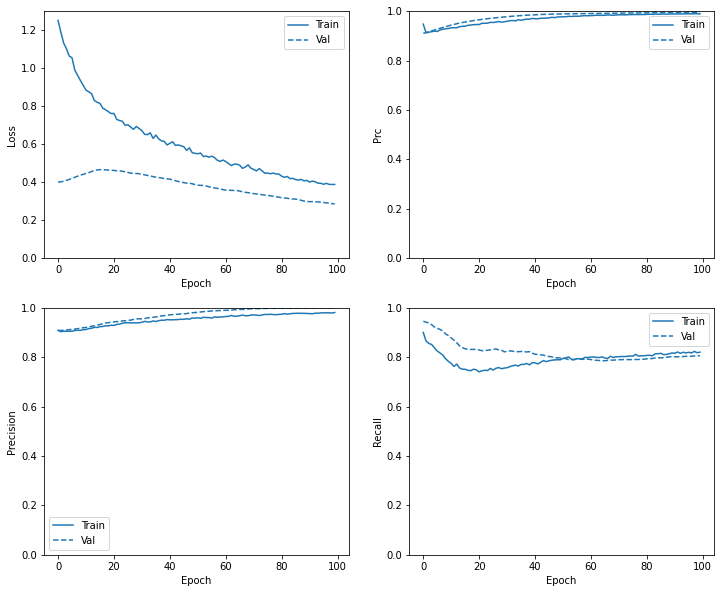

In [ ]:
plot_metrics(weighted_history)

# Evaluate metrics

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.30691516399383545
tp :  3397.0
fp :  7.0
tn :  348.0
fn :  872.0
accuracy :  0.8099048733711243
precision :  0.9979435801506042
recall :  0.7957367300987244
auc :  0.9484673142433167
prc :  0.9956480860710144

Legitimate Transactions Detected (True Negatives):  348
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  872
Fraudulent Transactions Detected (True Positives):  3397
Total Fraudulent Transactions:  4269


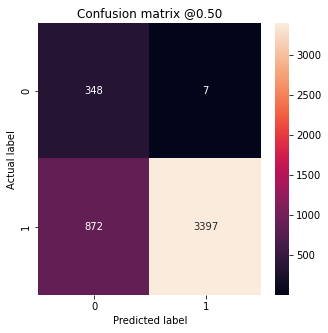

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

what we can see here, is what we expected. The classification has 0 misclassified or false positive for children who will die.  Accuracy is 82%

# Plot the ROC

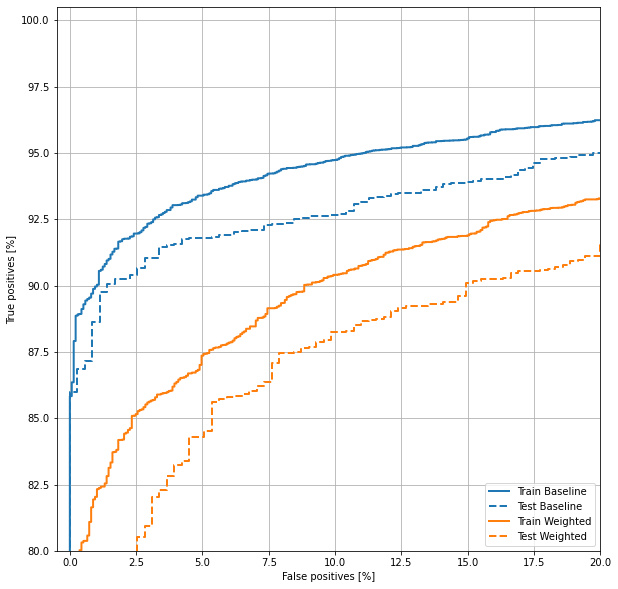

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

We can see that, the weighted model is less than that of the baseline.

# Over Sampling Method

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

# Using tf.data

In [ ]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

Each dataset provides (feature, label) pairs:

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.43201596 -0.3605456  -0.4613072   1.04021312 -0.50843514 -0.24003479
 -0.25449968  1.28268113 -0.59958746 -0.5689468  -0.0099366   0.34368988
  0.39020324  0.2235195  -0.81270771 -0.32849314 -0.34110265 -0.28493808
 -0.3031203  -0.33276979 -0.34332097 -0.34651068  2.46417932 -0.32836684
 -0.31076639 -0.69653238  0.53763105  0.62647473 -0.48909714 -0.19962715
 -1.02803737  1.43548331 -0.54529974 -0.49153629 -0.40637928 -0.34748875
 -1.13028997]

Label:  1


Merge the two together using tf.data.Dataset.sample_from_datasets:

In [ ]:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.494140625


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*pos/BATCH_SIZE)
resampled_steps_per_epoch

21.0

# Train on the oversampled data
Now we are training the model with the resampled data set instead of using class weights to see how these methods compare.

NB: Because the data was balanced by replicating the negative examples, the total dataset size is larger, and each epoch runs for more training steps.

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
21/21 [==============================] - 5s 128ms/step - loss: 0.8940 - tp: 11337.0000 - fp: 8012.0000 - tn: 13937.0000 - fn: 14346.0000 - accuracy: 0.5306 - precision: 0.5859 - recall: 0.4414 - auc: 0.5492 - prc: 0.6567 - val_loss: 0.9237 - val_tp: 1193.0000 - val_fp: 103.0000 - val_tn: 231.0000 - val_fn: 2172.0000 - val_accuracy: 0.3850 - val_precision: 0.9205 - val_recall: 0.3545 - val_auc: 0.5211 - val_prc: 0.9214
Epoch 2/100
21/21 [==============================] - 1s 66ms/step - loss: 0.8085 - tp: 8976.0000 - fp: 7998.0000 - tn: 13711.0000 - fn: 12323.0000 - accuracy: 0.5275 - precision: 0.5288 - recall: 0.4214 - auc: 0.5254 - prc: 0.5596 - val_loss: 0.8011 - val_tp: 1432.0000 - val_fp: 99.0000 - val_tn: 235.0000 - val_fn: 1933.0000 - val_accuracy: 0.4507 - val_precision: 0.9353 - val_recall: 0.4256 - val_auc: 0.5849 - val_prc: 0.9346
Epoch 3/100
21/21 [==============================] - 1s 69ms/step - loss: 0.7531 - tp: 9973.0000 - fp: 7804.0000 - tn: 13712.0000 - fn:

# Check training history
We can see that the distributions of metrics is different here, because the training data has a totally different distribution from the validation and test data.

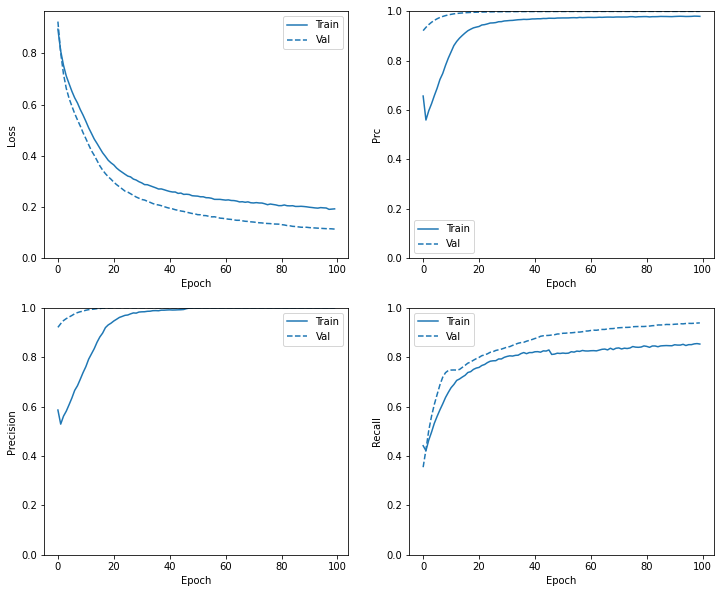

In [ ]:
plot_metrics(resampled_history)

# Retrain the model
Because training is easier on the balanced data, the above training procedure may overfit quickly.

So break up the epochs to give the tf.keras.callbacks.EarlyStopping finer control over when to stop training.

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=5*EPOCHS,
    #callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/500
20/20 [==============================] - 5s 129ms/step - loss: 0.8971 - tp: 10830.0000 - fp: 7695.0000 - tn: 13183.0000 - fn: 12951.0000 - accuracy: 0.5377 - precision: 0.5846 - recall: 0.4554 - auc: 0.5553 - prc: 0.6621 - val_loss: 0.9294 - val_tp: 1181.0000 - val_fp: 103.0000 - val_tn: 231.0000 - val_fn: 2184.0000 - val_accuracy: 0.3817 - val_precision: 0.9198 - val_recall: 0.3510 - val_auc: 0.5182 - val_prc: 0.9206
Epoch 2/500
20/20 [==============================] - 1s 65ms/step - loss: 0.8189 - tp: 8331.0000 - fp: 7645.0000 - tn: 12967.0000 - fn: 12017.0000 - accuracy: 0.5200 - precision: 0.5215 - recall: 0.4094 - auc: 0.5187 - prc: 0.5549 - val_loss: 0.8104 - val_tp: 1413.0000 - val_fp: 100.0000 - val_tn: 234.0000 - val_fn: 1952.0000 - val_accuracy: 0.4453 - val_precision: 0.9339 - val_recall: 0.4199 - val_auc: 0.5795 - val_prc: 0.9336
Epoch 3/500
20/20 [==============================] - 1s 67ms/step - loss: 0.7593 - tp: 9413.0000 - fp: 7443.0000 - tn: 12987.0000 - fn

# Re-check training history

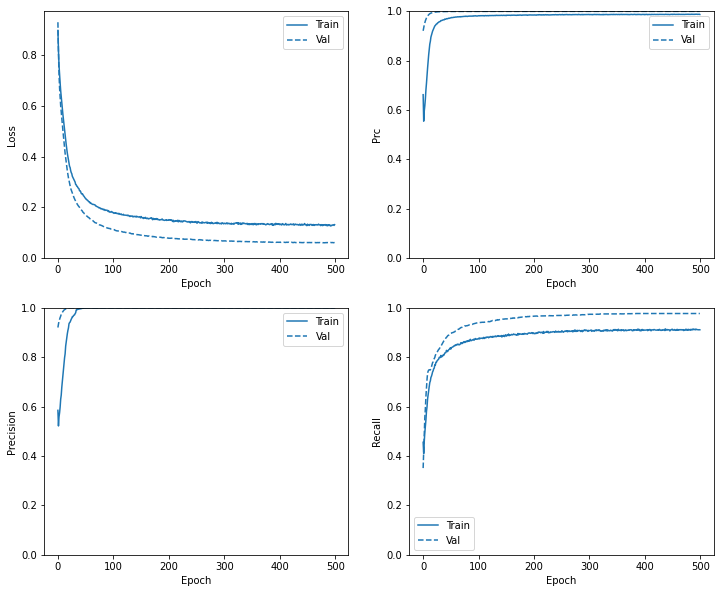

In [ ]:
plot_metrics(resampled_history)

# Evaluate metrics

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.06895751506090164
tp :  4158.0
fp :  0.0
tn :  355.0
fn :  111.0
accuracy :  0.9759948253631592
precision :  1.0
recall :  0.9739986062049866
auc :  0.991115152835846
prc :  0.9992842078208923

Legitimate Transactions Detected (True Negatives):  355
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  111
Fraudulent Transactions Detected (True Positives):  4158
Total Fraudulent Transactions:  4269


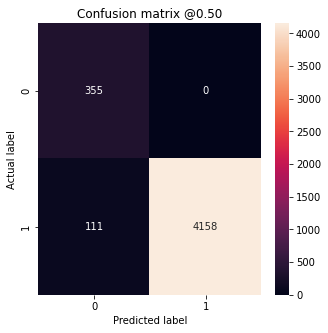

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

# As we can see, the number of false negative or misclassified children as dead has reduced as compared to the weight class model

# Plot the ROC

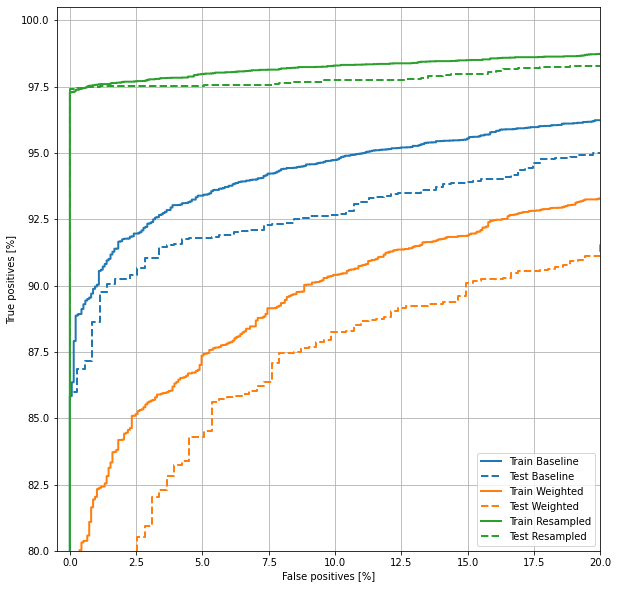

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

# The green line shows the oversample Area Under Curve (AUC) and has the highest.